In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
# importing the csv file 
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
# in the very first line i wnat to know the shape of dataframe 
df.shape

(10000, 14)

In [4]:
# in this i am chacking that which column has how much null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# this tells the dtype and null values also
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# this line work to get the duplicates in the df
df.duplicated().sum()

0

In [7]:
# thhis is categorical column and i want to know the unique values in them 
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [11]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [12]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [13]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [14]:
df['EstimatedSalary'].mean()
print(df['EstimatedSalary'].sum()/df.shape[0])

100090.239881


In [15]:
# droping the unnecessary column
df = df.drop(columns = ['RowNumber','CustomerId','Surname'],axis=1)

In [16]:
df.sample(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3127,776,Germany,Male,33,8,115130.34,1,0,0,129525.5,1


In [17]:
# this assign numbers to the categories in the df
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [18]:
df.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,1,False,False,False


In [19]:
# making of X and y
y = df['Exited']
X = df.drop("Exited",axis=1)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-06-19 12:06:21.037382: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750334781.287907      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750334781.355324      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:
# train test split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [23]:
# creting the object of the Standard
scaler = StandardScaler()

In [24]:
# this is the process to standardize the df
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled =  scaler.fit_transform(X_test)

In [25]:
# this is creating the object  the model
model = Sequential()

In [26]:
# here i am adding the three layers in our model 
# there in 11 inputs or columns in the df and i am making the 11 nodes in my first layer 
# and then also i am making the 11 nodes in my second layer and 
# one node in my third layer and the activation function for first two layer in relu
# for third layer it is sigmoid 
model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-19 12:06:36.046766: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [27]:
# ths tels the summary of model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# we are compiling the model here 
# loss function is logloss or binarycrossentropy and
# optimizer i Adam and metrics is accuracy 
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [29]:
# we are doing iterstions or epochs is 100
# validate with 20% data 
history = model.fit(X_train_Scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6609 - loss: 0.6259 - val_accuracy: 0.7994 - val_loss: 0.4749
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7960 - loss: 0.4664 - val_accuracy: 0.8037 - val_loss: 0.4440
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8068 - loss: 0.4332 - val_accuracy: 0.8075 - val_loss: 0.4321
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8130 - loss: 0.4183 - val_accuracy: 0.8131 - val_loss: 0.4224
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8055 - loss: 0.4220 - val_accuracy: 0.8156 - val_loss: 0.4112
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8148 - loss: 0.4061 - val_accuracy: 0.8219 - val_loss: 0.4016
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8308 - loss: 0.3895 - val_accuracy: 0.8325 - val_loss: 0.3911
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8362 - loss: 0.3867 - val_accu

In [30]:
# this tells us the weights and bias 
# here 121 weights and 11 bias 
model.layers[0].get_weights()

[array([[ 6.93789646e-02, -7.30950117e-01,  9.65682343e-02,
         -5.29856980e-02, -1.12901486e-01,  2.48368263e-01,
         -2.59789705e-01, -1.44718096e-01,  4.91721258e-02,
          3.35398376e-01, -1.36075780e-01],
        [-8.26881289e-01, -1.35437608e-01, -3.22299540e-01,
         -6.02610037e-02, -9.86152709e-01, -1.09516801e-02,
         -2.48837799e-01, -1.07620887e-01, -8.81727099e-01,
          8.60886881e-04, -4.04615879e-01],
        [-2.83181965e-01,  2.47518107e-01,  5.08771420e-01,
          4.48143110e-03,  5.25684133e-02,  1.08156867e-01,
         -3.42963368e-01,  5.97381964e-02, -2.56674904e-02,
         -8.41682315e-01, -2.64526922e-02],
        [ 1.71501562e-01, -2.35236928e-01, -6.46932185e-01,
          2.44984537e-01, -4.14659321e-01,  1.24737807e-01,
          8.47107172e-01, -6.10927224e-01,  4.05731171e-01,
         -7.29101181e-01, -7.75605261e-01],
        [ 1.55266792e-01, -1.84435457e-01, -2.18190789e-01,
          1.05250704e+00, -2.41522007e-02, -

In [31]:
# this tells us the weights and bias 
# here 121 weights and 11 bias 
model.layers[1].get_weights()

[array([[ 0.18671344,  0.4757892 , -0.27150345, -0.8389994 ,  0.28459197,
          0.36251634,  0.20908353,  0.38204718,  0.19519453, -0.09205997,
         -0.29146993],
        [ 0.06857036, -0.22779381,  0.11184365,  0.33241093, -0.24377199,
          0.21039444,  0.03251785,  0.61504567, -0.31119284,  0.1010765 ,
          0.11941552],
        [ 0.292501  , -0.2075475 , -0.5743769 , -0.23710074,  0.00569451,
         -0.03804106, -0.28295866,  0.1218863 , -0.24466057, -0.9135816 ,
         -0.42941204],
        [-0.3289135 ,  0.39739668, -0.2473864 ,  0.7392123 , -0.24419512,
         -0.24069047,  0.64505696, -0.293679  , -0.33684322, -0.97830147,
          0.574285  ],
        [-0.3096043 ,  0.3187866 , -0.2350651 , -0.8078161 ,  0.16917318,
          0.38763067, -0.01410486,  0.13447677, -0.8312727 , -0.57922226,
         -0.03380831],
        [-0.14065842,  0.23474729, -0.21246384,  0.6445973 ,  0.01536271,
          0.31077263, -0.83772457, -0.21378753,  0.18588674,  0.5378174

In [32]:
# here are 11 weights 1 bias 
model.layers[2].get_weights()

[array([[-0.6285423 ],
        [ 0.41178292],
        [ 0.6141333 ],
        [ 1.2702742 ],
        [-0.53138113],
        [-0.39420772],
        [ 1.117847  ],
        [-0.8713062 ],
        [ 1.9241908 ],
        [ 0.50463223],
        [ 1.228093  ]], dtype=float32),
 array([-0.5338493], dtype=float32)]

In [33]:
y_log = model.predict(X_test_Scaled)  # sigmoid ka answer 0 aur 1 ke beach me hota hai 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [34]:
# 0.5 se zada hai to yes hoga nahi to no hoga 
y_pred = np.where(y_log>0.5,1,0)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred)      

0.8615

In [37]:
import matplotlib.pyplot as plt 

In [38]:
# this is a dictionary in which there is 4 values these are 
# loss,val_loss,accuracy,val_acccuracy
history.history

{'accuracy': [0.7504687309265137,
  0.8010937571525574,
  0.8043749928474426,
  0.8092187643051147,
  0.8157812356948853,
  0.8217187523841858,
  0.8332812786102295,
  0.8396875262260437,
  0.8453124761581421,
  0.8475000262260437,
  0.8504687547683716,
  0.850781261920929,
  0.8510937690734863,
  0.8534374833106995,
  0.85546875,
  0.8551562428474426,
  0.8582812547683716,
  0.8553125262260437,
  0.8596875071525574,
  0.8581249713897705,
  0.8584374785423279,
  0.8606250286102295,
  0.8604687452316284,
  0.8607812523841858,
  0.8603125214576721,
  0.860156238079071,
  0.8643749952316284,
  0.8645312786102295,
  0.8650000095367432,
  0.8645312786102295,
  0.8612499833106995,
  0.8621875047683716,
  0.8656250238418579,
  0.8651562333106995,
  0.864062488079071,
  0.864062488079071,
  0.8653125166893005,
  0.8667187690734863,
  0.8660937547683716,
  0.8670312762260437,
  0.8657812476158142,
  0.8635937571525574,
  0.8670312762260437,
  0.8662499785423279,
  0.8657812476158142,
  0.866249

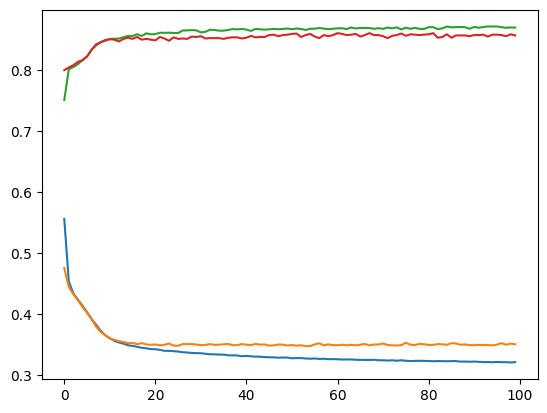

In [39]:
# ploting all 4 values in the graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])